In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import cvxpy as cp
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import genfromtxt
from scipy.optimize import linprog
plt.rcParams['figure.figsize'] = [10, 10]

### Data Generation
For each time $t$ until max time, $y_i$ stays the same with probability $p$ or jumps with probability $1 - p$.

In [3]:
np.random.rand()

0.7760429452942332

In [27]:
T = 200
x = []
y = []
p = 0.1
signal = np.random.normal(0, 1)
for t in range(T):
    x.append(t)
    y.append(signal + np.random.normal(0, 0.1))
    if np.random.rand() < p:
        signal += np.random.normal(0, 1)

In [28]:
x = np.array(x)
y = np.array(y)

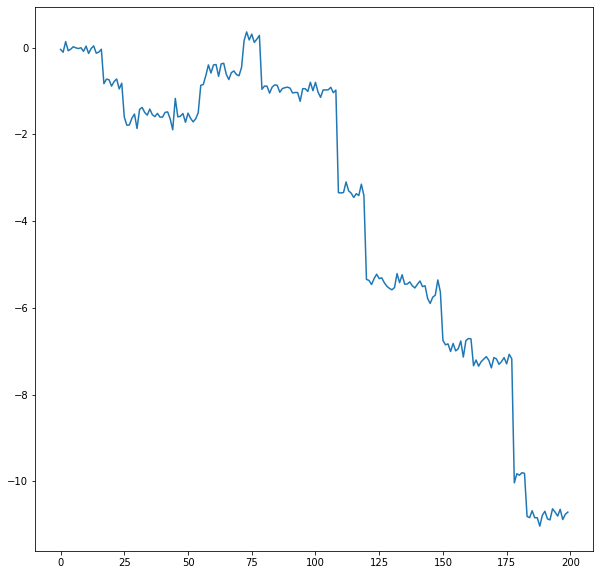

In [29]:
plt.plot(x, y)

### LASSO
LASSO is really just $l_1$ regularized least squares. The key idea is to use this $l_1$ regularizer to encourage sparsity in the solution. Here, we want to minimize the number of "jumps" in our signal, so that should correspond to our sparsity.

Mathematically, our optimization problem should be:
$$\text{min}_x \|x - y\|_2^2$$
subject to $\text{card}(Dx) \leq k$

Where $\text{card}$ is the cardinality function that returns the number of $0$ in the vector/matrix, and $D$ is the difference matrix. $k$ is an arbitrary number that denotes the maximum number of jumps that we allow.

By Hölder's inequality, $\text{card}(Dx) \leq k$ can be relaxed to $\|Dx\|_1 \leq k \|Dx\|_{\infty}$, which can be put into the objective.

Our optimization problem now becomes:
$$\text{min}_x \|Ax - y\|_2^2 + \lambda \|Dx\|_1$$

In [30]:
D = np.zeros((len(x) - 1, len(x)))
for i in range(len(x) - 1):
    D[i][i] = -1
    D[i][i + 1] = 1
D

array([[-1.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0., -1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0., -1., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ..., -1.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0., -1.,  1.]])

In [31]:
yhat = cp.Variable(len(x))
objective = cp.Minimize(cp.sum_squares(yhat - y) + cp.norm(D@yhat, 1))
constraints = []

In [32]:
problem = cp.Problem(objective, constraints)
result = problem.solve()
yhat.value

array([ -0.05715233,  -0.05715233,  -0.05715233,  -0.05715233,
        -0.05715233,  -0.05715233,  -0.05715233,  -0.05715233,
        -0.05715233,  -0.05715233,  -0.05715233,  -0.05715233,
        -0.05715233,  -0.05715233,  -0.09037847,  -0.09037847,
        -0.09037847,  -0.76650446,  -0.76650446,  -0.76650446,
        -0.79820805,  -0.79820805,  -0.79820805,  -0.88729194,
        -0.88729194,  -1.54933436,  -1.54933436,  -1.54933436,
        -1.54933436,  -1.54933436,  -1.54933436,  -1.54933436,
        -1.54933436,  -1.54933436,  -1.54933436,  -1.54933436,
        -1.54933436,  -1.54933436,  -1.54933436,  -1.54933436,
        -1.54933436,  -1.54933436,  -1.54933436,  -1.54933436,
        -1.54933436,  -1.54933436,  -1.54933436,  -1.54933436,
        -1.54933436,  -1.54933436,  -1.54933436,  -1.54933436,
        -1.54933436,  -1.54933436,  -1.49976442,  -0.8697592 ,
        -0.84959884,  -0.64108626,  -0.53185294,  -0.53185294,
        -0.53185294,  -0.53185294,  -0.53185294,  -0.53

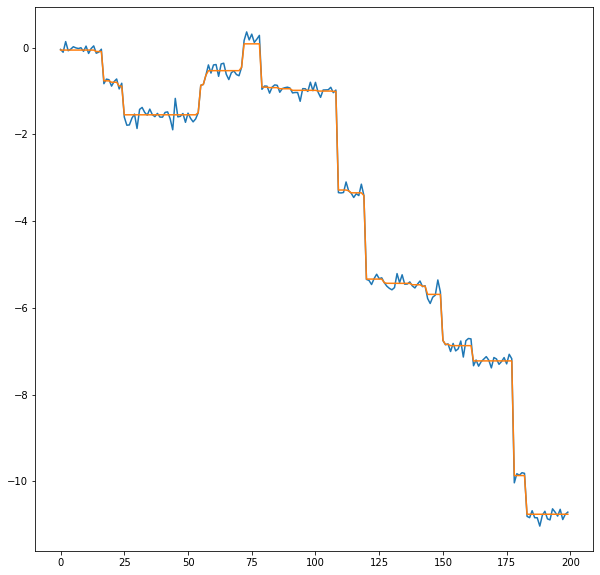

In [34]:
plt.plot(x, y)
plt.plot(x, yhat.value)